In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_digits
from sklearn import metrics

from sklearn.datasets._samples_generator import  make_blobs
from scipy.spatial.distance import cdist

import seaborn as sns; sns.set()

from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import confusion_matrix, accuracy_score



#from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


# TODO determine the best k for k-means
# TODO calculate accuracy for best K
# TODO draw a confusion matrix

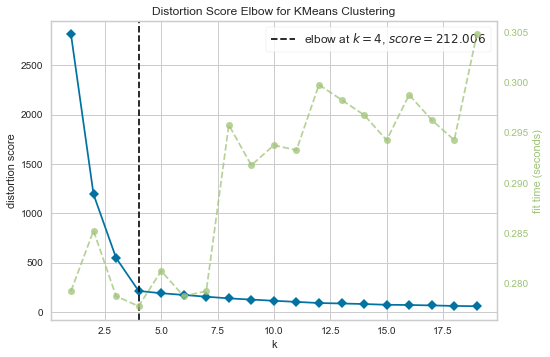

(300,)
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]
Accuracy 1.0


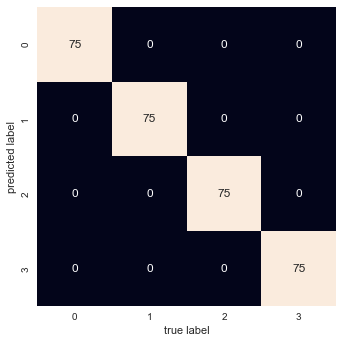

In [24]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)
visualizer.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=0)

clusters = kmeans.fit_predict(X)


# prepare our predictions
from scipy.stats import mode

#        create a zero matrix with the same shape
labels = np.zeros_like(clusters)
for i in range(k):
    # this is similar to another for loop to check every element of clusters
    # group all the elements of clusters == i, then assign these elements to mask
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]
    
print(labels.shape)
print(labels)

print("Accuracy {}".format(accuracy_score(y_true, labels)))

mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels='auto', yticklabels='auto')
plt.xlabel('true label')
plt.ylabel('predicted label');


In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(3, 2)